In [11]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [5]:
FILE = 'okdw.png'

In [6]:
img = cv2.imread(FILE)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_inv = cv2.bitwise_not(gray)
ret, th1 = cv2.threshold(gray_inv, 160, 255, cv2.THRESH_BINARY)

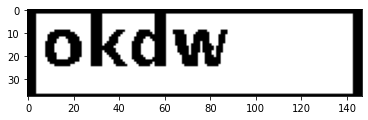

In [10]:
plt.imshow(th1, cmap='gray')

In [9]:
th1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
FILE_OUT = 'test_bw.png'
cv2.imwrite(FILE_OUT, th1)

True

In [13]:
DEFAULT_TEMPLATE_MATCHING_THRESHOLD = 0.8

In [14]:
class Template:
    def __init__(
        self,
        image_path,
        label,
        color,
        matching_threshold=DEFAULT_TEMPLATE_MATCHING_THRESHOLD
    ):
        self.image_path = image_path
        self.label = label
        self.color = color
        self.template = cv2.imread(image_path)
        self.template_height, self.template_width = self.template.shape[:2]
        self.matching_threshold = matching_threshold

In [20]:
image = cv2.imread(FILE_OUT)
templates = [
    Template(image_path="d.png", label="d", color=(0, 0, 255))
]

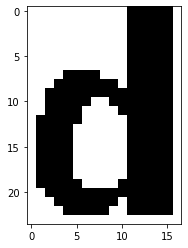

In [16]:
plt.imshow(templates[0].template)

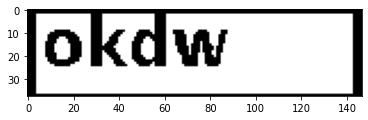

In [21]:
plt.imshow(image)

In [22]:
detections = []
for template in templates:
    template_matching = cv2.matchTemplate(
        template.template, image, cv2.TM_CCOEFF_NORMED
    )
    match_locations = np.where(template_matching >= template.matching_threshold)
    for (x, y) in zip(match_locations[1], match_locations[0]):
        match = {
            "TOP_LEFT_X": x,
            "TOP_LEFT_Y": y,
            "BOTTOM_RIGHT_X": x + template.template_width,
            "BOTTOM_RIGHT_Y": y + template.template_height,
            "MATCH_VALUE": template_matching[y, x],
            "LABEL": template.label,
            "COLOR": template.color
        }
        
        detections.append(match)

In [24]:
detections

[{'TOP_LEFT_X': 45,
  'TOP_LEFT_Y': 2,
  'BOTTOM_RIGHT_X': 62,
  'BOTTOM_RIGHT_Y': 26,
  'MATCH_VALUE': 0.98043984,
  'LABEL': 'd',
  'COLOR': (0, 0, 255)},
 {'TOP_LEFT_X': 45,
  'TOP_LEFT_Y': 3,
  'BOTTOM_RIGHT_X': 62,
  'BOTTOM_RIGHT_Y': 27,
  'MATCH_VALUE': 0.8088926,
  'LABEL': 'd',
  'COLOR': (0, 0, 255)}]

In [25]:
detections_ = sorted(detections, key=lambda obj: obj['MATCH_VALUE'], reverse=True)

In [26]:
detections_[0]

[{'TOP_LEFT_X': 45,
  'TOP_LEFT_Y': 2,
  'BOTTOM_RIGHT_X': 62,
  'BOTTOM_RIGHT_Y': 26,
  'MATCH_VALUE': 0.98043984,
  'LABEL': 'd',
  'COLOR': (0, 0, 255)},
 {'TOP_LEFT_X': 45,
  'TOP_LEFT_Y': 3,
  'BOTTOM_RIGHT_X': 62,
  'BOTTOM_RIGHT_Y': 27,
  'MATCH_VALUE': 0.8088926,
  'LABEL': 'd',
  'COLOR': (0, 0, 255)}]

In [27]:
image_with_detections = image.copy()
for detection in detections_[:1]:
    cv2.rectangle(
        image_with_detections,
        (detection["TOP_LEFT_X"], detection["TOP_LEFT_Y"]),
        (detection["BOTTOM_RIGHT_X"], detection["BOTTOM_RIGHT_Y"]),
        detection["COLOR"],
        2
    )

In [28]:
cv2.imwrite("result_2.jpeg", image_with_detections)

True